<a href="https://colab.research.google.com/github/rakimfanny/mycodes/blob/main/Copy_of_DS_C42_NLP_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('electric.csv')
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.6803
1,1985-02-01,70.8479
2,1985-03-01,62.6166
3,1985-04-01,57.6106
4,1985-05-01,55.4467


Before we may apply ARIMA modelling on top the following time series data, we have to make the following changes:
1. The index of the dataframe is the time component
2. The index of the dataframe should be in pands datetime format.

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.6803
1,1985-02-01,70.8479
2,1985-03-01,62.6166
3,1985-04-01,57.6106
4,1985-05-01,55.4467


In [ ]:
df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [ ]:
df.set_index('DATE', inplace = True)

In [ ]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [ ]:
df.columns = ['Energy Production']

In [ ]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


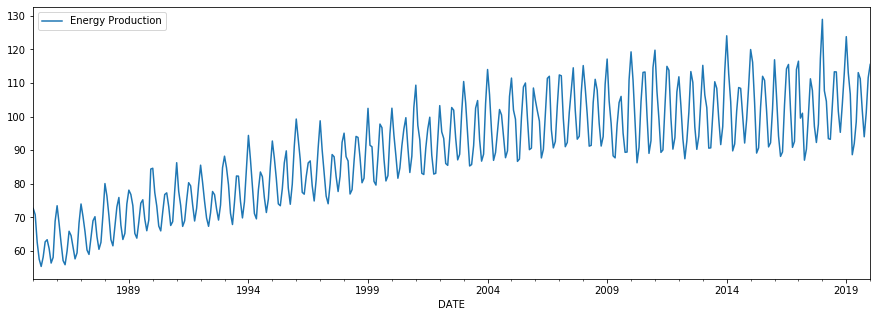

In [ ]:
df.plot(figsize = (15,5))

## Stationarity Check

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)
print('P-Value: ', adf_test[1])

P-Value:  0.08727631539909048


Since the p-value>0.05, is not a stationary time series

## Differencing

In [ ]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [ ]:
70.8479-72.6803

-1.832400000000007

In [ ]:
df.diff()

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8324
1985-03-01,-8.2313
1985-04-01,-5.0060
1985-05-01,-2.1639
...,...
2019-09-01,-9.2658
2019-10-01,-8.0039
2019-11-01,7.0766


In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df.diff().dropna())
print('P-Value: {0:0.20f}'.format(adf_test[1]))

P-Value: 0.00000000007751970099


Now the time series is stationary

- Number of level of differencing required: d: 1

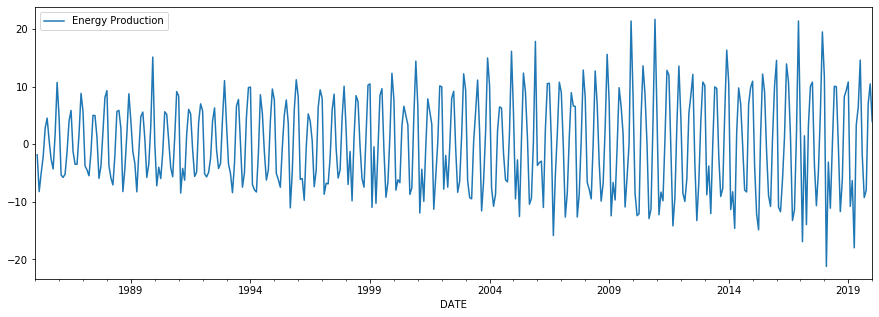

In [ ]:
df.diff().plot(figsize = (15,5))

- d = 1

## ACF and PACF plot

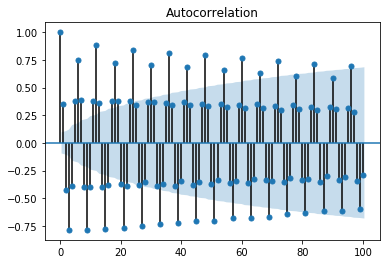

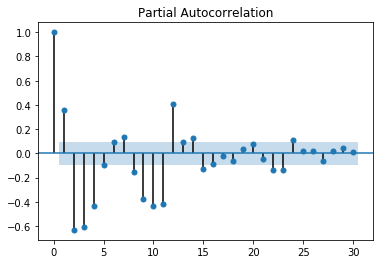

In [ ]:
import statsmodels.graphics.tsaplots as tsa

tsa.plot_acf(df.diff().dropna(), lags =100)
tsa.plot_pacf(df.diff().dropna(), lags =30)
plt.show()

- p :12
- d :1
- q :0

## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order = (12,1,0))
result = model.fit()

C:\Users\SUMITH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SUMITH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Energy Production   No. Observations:                  420
Model:                 ARIMA(12, 1, 0)   Log Likelihood               -1022.227
Method:                        css-mle   S.D. of innovations              2.721
Date:                 Sun, 16 Oct 2022   AIC                           2072.453
Time:                         14:41:54   BIC                           2129.017
Sample:                     02-01-1985   HQIC                          2094.810
                          - 01-01-2020                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0999      0.027      3.752      0.000       0.048       0.152
ar.L1.D.Energy Production     -0.3942      0.046     -8.558      0.000      -0.484      -0.304
ar.L2.D.Energy Production     -0.4633      0.048     -9.642      0.000      -0.557      -0.369
ar.L3.D.Energy Production     -0.4460      0.050     -8.957      0.000      -0.544      -0.348
ar.L4.D.Energy Production     -0.4608      0.050     -9.222      0.000      -0.559      -0.363
ar.L5.D.Energy Production     -0.4332      0.052     -8.401      0.000      -0.534      -0.332
ar.L6.D.Energy Production     -0.3847      0.053     -7.201      0.000      -0.489      -0.280
ar.L7.D.Energy Production     -0.3239      0.053     -6.072      0.000      -0.428      -0.219
ar.L8.D.Energy Production     -0.3759      0.052     -7.250      0.000      -0.478      -0.274
ar.L9.D.Energy Production     -0.4528      0.050     -9.081      0.000      -0.551      -0.355
ar.L10.D.Energy Production    -0.3738      0.051     -7.333      0.000      -0.474      -0.274
ar.L11.D.Energy Production    -0.2749      0.048     -5.674      0.000      -0.370      -0.180
ar.L12.D.Energy Production     0.3480      0.047      7.418      0.000       0.256       0.440
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0515           -0.0000j            1.0515           -0.5000
AR.2            -0.9017           -0.5307j            1.0463           -0.4153
AR.3            -0.9017           +0.5307j            1.0463            0.4153
AR.4            -0.5226           -0.9159j            1.0545           -0.3325
AR.5            -0.5226           +0.9159j            1.0545            0.3325
AR.6            -0.0251           -1.0391j            1.0394           -0.2538
AR.7            -0.0251           +1.0391j            1.0394            0.2538
AR.8             0.5005           -0.8681j            1.0020           -0.1668
AR.9             0.5005           +0.8681j            1.0020            0.1668
AR.10            0.8879           -0.5156j            1.0268           -0.0837
AR.11            0.8879           +0.5156j            1.0268            0.0837
AR.12            1.9634           -0.0000j            1.9634           -0.0000
------------------------------------------------------------------------------
"""

In [ ]:
result.predict()

1985-02-01     0.099928
1985-03-01    -0.556129
1985-04-01    -3.265643
1985-05-01     2.599135
1985-06-01     7.397513
                ...    
2019-09-01   -10.006587
2019-10-01    -5.769375
2019-11-01     7.279231
2019-12-01    10.434664
2020-01-01     9.986809
Freq: MS, Length: 420, dtype: float64

In [ ]:
y_pred = result.predict(typ = 'levels')

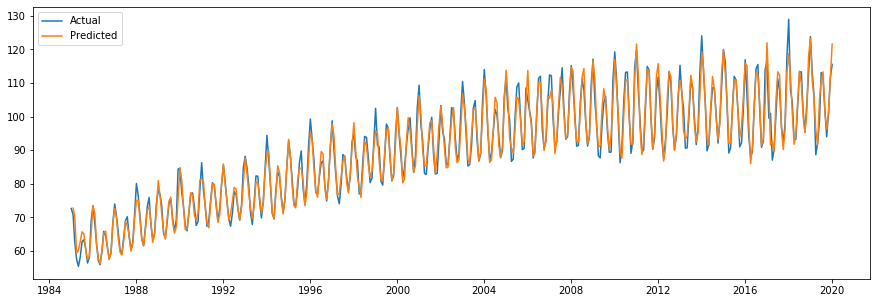

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
result.predict(typ = 'levels', start = '2020-01-01', end = '2020-06-01')

2020-01-01    121.551209
2020-02-01    110.877434
2020-03-01    104.138172
2020-04-01     90.329942
2020-05-01     93.185300
2020-06-01    102.174487
Freq: MS, dtype: float64

## MAPE

In [ ]:
def MAPE(y_a, y_p):
    return np.mean(np.abs((y_a-y_p)/y_a))*100

In [ ]:
MAPE(df['Energy Production'], y_pred)

2.2232145741766716